# Notebook di training POKEMON

## Import di librerie e dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#alcune opzioni per pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
pokemon = pd.read_csv("./pokemon.csv")

## Anlisi dei dati per capire se c'è un legame tra le features

### Analisi train/test set

In [4]:
train.sample(5)

,Winner,First_pokemon,Second_pokemon
29063,633,633,88
23199,316,316,124
343,682,250,682
3055,65,351,65
1814,662,530,662


In [5]:
train.describe(include="all")

,Winner,First_pokemon,Second_pokemon
count,32000.000000,32000.000000,32000.000000
mean,408.518594,400.254125,402.733125
std,230.933331,229.386117,229.845186
min,1.000000,1.000000,1.000000
25%,206.000000,203.000000,206.000000
50%,422.000000,399.000000,402.000000
75%,604.000000,597.000000,602.000000
max,800.000000,800.000000,800.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          32000 non-null  int64
 1   First_pokemon   32000 non-null  int64
 2   Second_pokemon  32000 non-null  int64
dtypes: int64(3)
memory usage: 750.1 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Winner          8000 non-null   int64
 1   First_pokemon   8000 non-null   int64
 2   Second_pokemon  8000 non-null   int64
dtypes: int64(3)
memory usage: 187.6 KB


In [8]:
pd.isnull(train).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [9]:
pd.isnull(test).sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

#### I dataset di train e test sembrano essere apposto, ovvero sono composti da tre colonne di elevata importanza per il nostro fine, non hanno valori nulli e i dati sono tutti del tipo più appropriato. Non c'è altro da fare su questi dati. 

### Analisi Pokemon dataset

In [10]:
# per comodità e per non avere problemi quando provo ad accedere alle features, ho rinominato le colonne
pokemon = pokemon.rename(columns={'#': 'ID'})
pokemon = pokemon.rename(columns={'Type 1': 'Type1'})
pokemon = pokemon.rename(columns={'Type 2': 'Type2'})

In [11]:
pokemon.sample(20)

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
793,794,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
509,510,Snover,Grass,Ice,60,62,50,62,60,40,4,False
106,107,Krabby,Water,NaN,30,105,90,25,25,50,1,False
303,304,Ralts,Psychic,Fairy,28,25,25,45,35,40,3,False
93,94,Seel,Water,NaN,65,45,55,45,70,45,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
366,367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False
526,527,Gallade,Psychic,Fighting,68,125,65,65,115,80,4,False
290,291,Beautifly,Bug,Flying,60,70,50,100,50,65,3,False
501,502,Skorupi,Poison,Bug,40,50,90,30,55,65,4,False


In [12]:
pokemon.describe(include='all')

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,799,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Ledyba,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [13]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          800 non-null    int64 
 1   Name        799 non-null    object
 2   Type1       800 non-null    object
 3   Type2       414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [14]:
pd.isnull(pokemon).sum()

ID              0
Name            1
Type1           0
Type2         386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

#### Da una prima analisi ho notato che sono presenti diverse features che non sono necessari per addestrare il modello, come ad esempio il nome e l'ID del pokemon. Inoltre sono presenti alcuni valori nulli e colonne con dtype object. Devo lavorare su tutti questi aspetti.

#### Continuo a cercare di dare un significato concreto ai dati a disposizione

<AxesSubplot:xlabel='Generation', ylabel='count'>

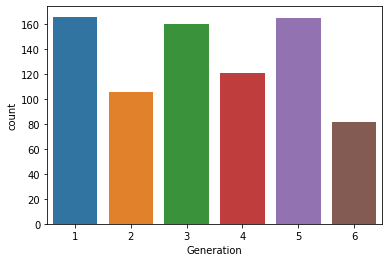

In [15]:
sns.countplot(x=pokemon["Generation"])

<AxesSubplot:xlabel='Legendary', ylabel='count'>

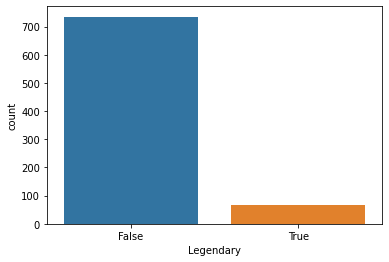

In [16]:
sns.countplot(x=pokemon["Legendary"])

#### I pokemon leggendari sono circa 1/8 di quelli totali, sarebbe interessante capire se hanno qualche valore speciale nelle altre features, in caso potrei eliminare questa feature

<AxesSubplot:xlabel='Legendary', ylabel='HP'>

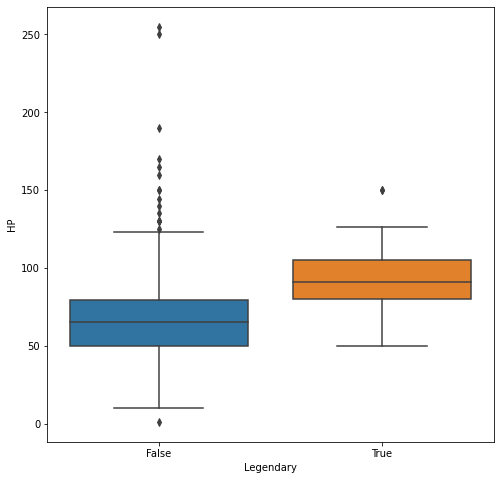

In [17]:
# confronto tra gli HP dei pokemon leggenadri e quelli non
plt.figure(figsize=(8, 8))
sns.boxplot(x='Legendary',y='HP',data=pokemon)

<AxesSubplot:xlabel='Legendary', ylabel='Attack'>

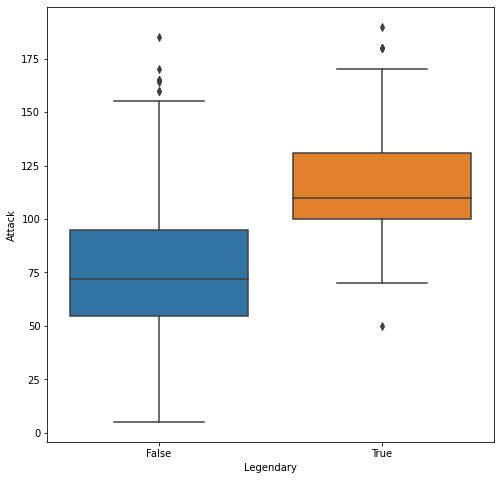

In [18]:
# confronto tra i punti difesa dei pokemon leggenadri e quelli non
plt.figure(figsize=(8, 8))
sns.boxplot(x='Legendary',y='Attack',data=pokemon)

<AxesSubplot:xlabel='Legendary', ylabel='Defense'>

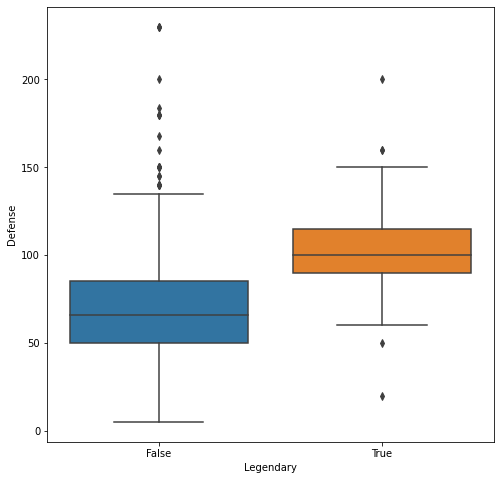

In [19]:
# confronto tra i punti attacco dei pokemon leggenadri e quelli non
plt.figure(figsize=(8, 8))
sns.boxplot(x='Legendary',y='Defense',data=pokemon)

<AxesSubplot:xlabel='Legendary', ylabel='Sp. Atk'>

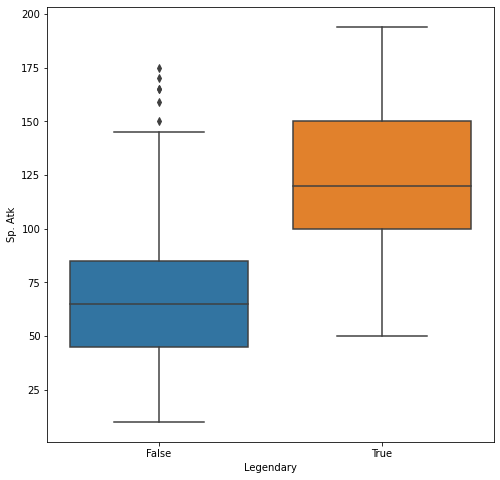

In [20]:
# confronto tra i punti attacco speciale dei pokemon leggenadri e quelli non
plt.figure(figsize=(8, 8))
sns.boxplot(x='Legendary',y='Sp. Atk',data=pokemon)

<AxesSubplot:xlabel='Legendary', ylabel='Sp. Def'>

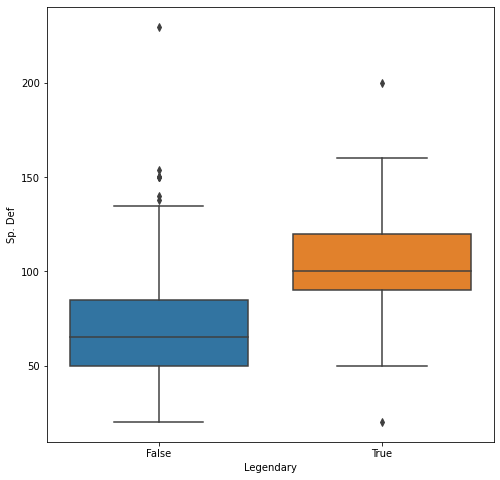

In [21]:
# confronto tra i punti difesa speciale dei pokemon leggenadri e quelli non
plt.figure(figsize=(8, 8))
sns.boxplot(x='Legendary',y='Sp. Def',data=pokemon)

#### I pokemon leggendari effettivamente hanno dei valori più alti della media, quindi potrei in seguito eliminare questa feature

#### Ci sono alcuni pokemo con type2 nullo, sono più forti/deboli degli altri? 

In [22]:
type2null = pokemon.loc[pokemon['Type2'].isnull()]

In [23]:
type2null

,ID,Name,Type1,Type2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False
10,11,Wartortle,Water,NaN,59,63,80,65,80,58,1,False
11,12,Blastoise,Water,NaN,79,83,100,85,105,78,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
775,776,Sliggoo,Dragon,NaN,68,75,53,83,113,60,6,False
776,777,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False
788,789,Bergmite,Ice,NaN,55,69,85,32,35,28,6,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,6,False


<AxesSubplot:xlabel='Generation', ylabel='count'>

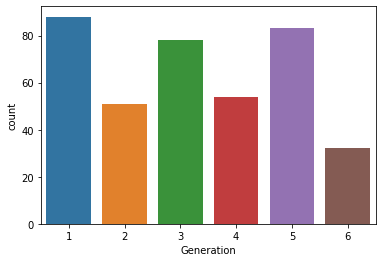

In [24]:
# quanti pokemon ci sono per ogni generazione con type2 null
sns.countplot(x=type2null["Generation"])

<AxesSubplot:xlabel='Legendary', ylabel='count'>

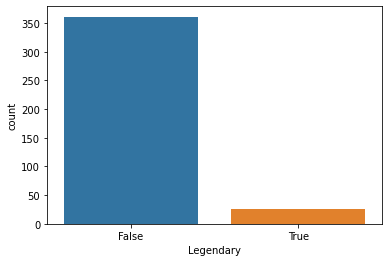

In [25]:
# quanti pokemon ci sono per ogni pokemon leggendario con type2 null
sns.countplot(x=type2null["Legendary"])

#### Quelli con un solo typo di attacco non hanno nulla di speciale, difatti si può anche notare che la percentuali di leggendari con type2 nullo è simile alla percentuale di leggendari sul totale

## Trasformazione dei dati

### Encoding sui dati di train/test

In [26]:
# Winner vale 0 se vince il primo pokemon (quello che attacca per primo), 1 se vince il secondo.

train.loc[train['Winner'] == train['First_pokemon'], 'Winner'] = 0
train.loc[train['Winner'] == train['Second_pokemon'], 'Winner'] = 1

test.loc[test['Winner'] == test['First_pokemon'], 'Winner'] = 0
test.loc[test['Winner'] == test['Second_pokemon'], 'Winner'] = 1

In [27]:
train.sample(5)

,Winner,First_pokemon,Second_pokemon
1796,1,580,345
8134,0,284,722
19276,0,27,298
10613,0,521,352
2573,0,543,389


### Per poter addestrare il modello e per capire una eventuale correlazione tra le features è necessario effetuare un join tra i due dataset in quanto separati non danno alcuna informazione

In [28]:
fights = pd.merge(train, pokemon, left_on='First_pokemon', right_on='ID')
fights_test = pd.merge(test, pokemon, left_on='First_pokemon', right_on='ID')

In [29]:
fights = pd.merge(fights, pokemon, left_on='Second_pokemon', right_on='ID')
fights_test = pd.merge(fights_test, pokemon, left_on='Second_pokemon', right_on='ID')

In [30]:
fights.head(10)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y
0,1,121,146,121,Rhydon,Ground,Rock,105,130,120,45,45,40,1,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
1,1,615,146,615,Darumaka,Fire,NaN,70,90,45,15,45,50,5,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
2,0,249,146,249,Mega Houndoom,Dark,Fire,75,90,90,140,90,115,2,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
3,1,334,146,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
4,0,367,146,367,Mega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
5,1,167,146,167,Chikorita,Grass,NaN,45,49,65,49,65,45,2,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
6,0,648,146,648,Sawsbuck,Normal,Grass,80,100,70,60,70,95,5,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
7,1,620,146,620,Crustle,Bug,Rock,70,95,125,65,75,45,5,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
8,0,677,146,677,Cryogonal,Ice,NaN,70,50,30,95,135,105,5,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False
9,0,13,146,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,146,Vaporeon,Water,NaN,130,65,60,110,95,65,1,False


### Dato che all'inizio ho notato che i pokemon leggendari sono generalmente più forti degli altri, non è che vincono sempre (contro quelli non leggendari)?

In [31]:
# Aggiungo una feature al dataset, che indica se il vincitore tra uno scontro tra un leggendario e uno non
# -> 1 se vince il leggendario 0 altrimenti
conditions = [(fights['Winner'] == 1),(fights['Winner'] == 0)]
choices = [fights['Legendary_x'], fights['Legendary_y']]
fights['LegendaryWinner'] = np.select(conditions, choices)
fights.sample(10)

,Winner,First_pokemon,Second_pokemon,ID_x,Name_x,Type1_x,Type2_x,HP_x,Attack_x,Defense_x,Sp. Atk_x,Sp. Def_x,Speed_x,Generation_x,Legendary_x,ID_y,Name_y,Type1_y,Type2_y,HP_y,Attack_y,Defense_y,Sp. Atk_y,Sp. Def_y,Speed_y,Generation_y,Legendary_y,LegendaryWinner
28343,1,760,32,760,Barbaracle,Rock,Water,72,105,115,54,86,68,6,False,32,Raichu,Electric,NaN,60,90,55,90,80,110,1,False,0
20049,1,149,509,149,Porygon,Normal,NaN,65,60,70,85,75,40,1,False,509,Mantyke,Water,Flying,45,20,50,60,120,50,4,False,0
18173,0,339,725,339,Manectric,Electric,NaN,70,75,60,105,60,105,3,False,725,Froakie,Water,NaN,41,56,40,62,44,71,6,False,0
30337,0,726,627,726,Frogadier,Water,NaN,54,63,52,83,56,97,6,False,627,Carracosta,Water,Rock,74,108,133,83,65,32,5,False,0
11109,1,210,117,210,Wooper,Water,Ground,55,45,45,25,25,15,2,False,117,Lickitung,Normal,NaN,90,55,75,60,75,30,1,False,0
6432,0,223,53,223,Gligar,Ground,Flying,65,75,105,35,65,85,2,False,53,Parasect,Bug,Grass,60,95,80,60,80,30,1,False,0
5740,0,635,212,635,Cinccino,Normal,NaN,75,95,60,65,60,115,5,False,212,Espeon,Psychic,NaN,65,65,60,130,95,110,2,False,0
22949,1,196,70,196,Ampharos,Electric,NaN,90,75,85,115,90,55,2,False,70,Kadabra,Psychic,NaN,40,35,30,120,70,105,1,False,0
19989,1,13,508,13,Mega Blastoise,Water,NaN,79,103,120,135,115,78,1,False,508,Lumineon,Water,NaN,69,69,76,69,86,91,4,False,0
2472,1,97,250,97,Muk,Poison,NaN,105,105,75,65,100,50,1,False,250,Kingdra,Water,Dragon,75,95,95,95,95,85,2,False,0


<AxesSubplot:xlabel='LegendaryWinner', ylabel='count'>

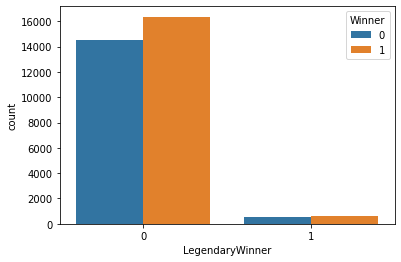

In [32]:
sns.countplot(x=fights["LegendaryWinner"],hue=fights["Winner"])

#### Non c'è un evidente supremazia dei leggendari

### Chi attacca per primo ha qualche vantaggio?

<AxesSubplot:xlabel='Winner', ylabel='count'>

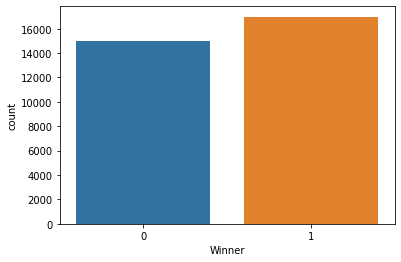

In [33]:
sns.countplot(x="Winner", data=fights)

#### Evidentemente no

### Vediamo la correlazione tra le diverse features

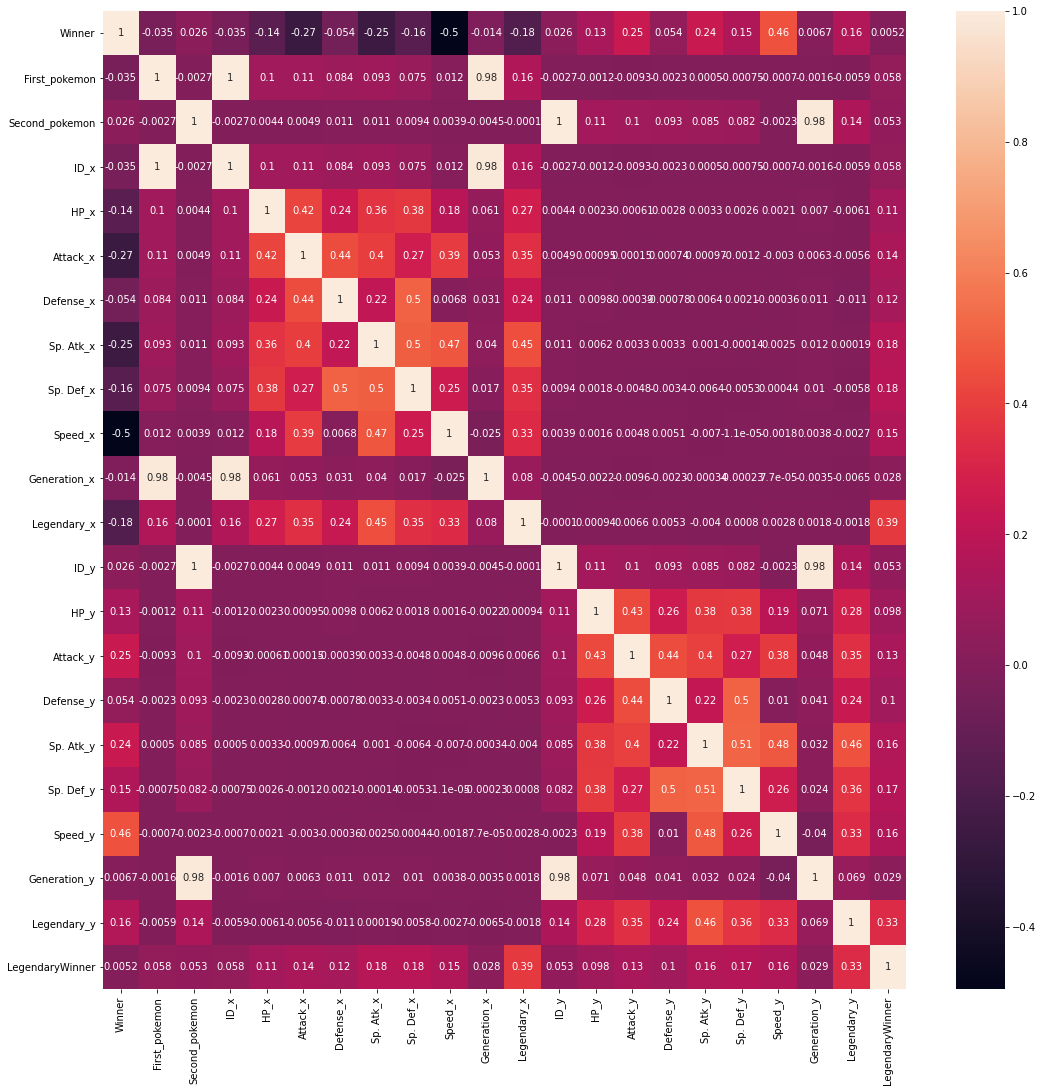

In [34]:
plt.subplots(figsize=(18,18))
sns.heatmap(fights.corr(), annot=True)
plt.show()

#### La generazione ha una correlazione bassa con la vittaria, quindi non incide sulla forza di un pokemon -> la eliminerò.

### Con le features in questo modo non si ha effettivamente modo di capire/evidenziare quali sono le proprietà del vincitore. Penso sia più utile vedere quali sono le differenze tra vincitore e vinto.


In [35]:
fights["Sp_Atk_diff"] = fights["Sp. Atk_x"] - fights["Sp. Atk_y"]
fights["Speed_diff"] = fights["Speed_x"] - fights["Speed_y"]
fights["Sp_Def_diff"] = fights["Sp. Def_x"] - fights["Sp. Def_y"]
fights["Defense_diff"] = fights["Defense_x"] - fights["Defense_y"]
fights["HP_diff"] = fights["HP_x"] - fights["HP_y"]
fights["Attack_diff"] = fights["Attack_x"] - fights["Attack_y"]

### Ora elimino anche tutte le features indicare in precedenza come Nome, Id, Generazione e Legendary, per i motivi indicati nell'analisi

In [36]:
fights = fights[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", "Defense_diff", "HP_diff", "Attack_diff", 
                  "Type1_x", "Type1_y", "Type2_x", "Type2_y","Winner"]]


In [37]:
# replico anche per il test set
fights_test["Sp_Atk_diff"] = fights_test["Sp. Atk_x"] - fights_test["Sp. Atk_y"]
fights_test["Speed_diff"] = fights_test["Speed_x"] - fights_test["Speed_y"]
fights_test["Sp_Def_diff"] = fights_test["Sp. Def_x"] - fights_test["Sp. Def_y"]
fights_test["Defense_diff"] = fights_test["Defense_x"] - fights_test["Defense_y"]
fights_test["HP_diff"] = fights_test["HP_x"] - fights_test["HP_y"]
fights_test["Attack_diff"] = fights_test["Attack_x"] - fights_test["Attack_y"]

fights_test = fights_test[["Sp_Atk_diff", "Speed_diff", "Sp_Def_diff", "Defense_diff", "HP_diff", "Attack_diff",
                  "Type1_x", "Type1_y", "Type2_x", "Type2_y","Winner"]]

In [38]:
fights

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Winner
0,-65,-25,-50,60,-25,65,Ground,Water,Rock,NaN,1
1,-95,-15,-50,-15,-60,25,Fire,Water,NaN,NaN,1
2,30,50,-5,30,-55,25,Dark,Water,Fire,NaN,0
3,-50,-15,-15,170,-60,75,Steel,Water,NaN,NaN,1
4,0,15,10,50,-55,45,Dragon,Water,Fairy,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
31995,20,53,74,17,1,-3,Grass,Fire,Fighting,Fighting,0
31996,-15,35,0,25,-10,-13,Normal,Fire,NaN,Fighting,0
31997,60,5,35,60,-20,-23,Electric,Fire,Steel,Fighting,0
31998,-25,0,10,75,10,-3,Water,Fire,Rock,Fighting,1


### E'il momento di gestire i valori nulli


In [39]:
# I pokemon che non hanno un secondo tipo di attacco, usano sempre il primo
fights['Type2_x'].fillna(fights['Type1_x'], inplace=True)
fights['Type2_y'].fillna(fights['Type1_y'], inplace=True)

#anche per il test set
fights_test['Type2_x'].fillna(fights_test['Type1_x'], inplace=True)
fights_test['Type2_y'].fillna(fights_test['Type1_y'], inplace=True)

In [40]:
fights

,Sp_Atk_diff,Speed_diff,Sp_Def_diff,Defense_diff,HP_diff,Attack_diff,Type1_x,Type1_y,Type2_x,Type2_y,Winner
0,-65,-25,-50,60,-25,65,Ground,Water,Rock,Water,1
1,-95,-15,-50,-15,-60,25,Fire,Water,Fire,Water,1
2,30,50,-5,30,-55,25,Dark,Water,Fire,Water,0
3,-50,-15,-15,170,-60,75,Steel,Water,Steel,Water,1
4,0,15,10,50,-55,45,Dragon,Water,Fairy,Water,0
...,...,...,...,...,...,...,...,...,...,...,...
31995,20,53,74,17,1,-3,Grass,Fire,Fighting,Fighting,0
31996,-15,35,0,25,-10,-13,Normal,Fire,Normal,Fighting,0
31997,60,5,35,60,-20,-23,Electric,Fire,Steel,Fighting,0
31998,-25,0,10,75,10,-3,Water,Fire,Rock,Fighting,1


<AxesSubplot:>

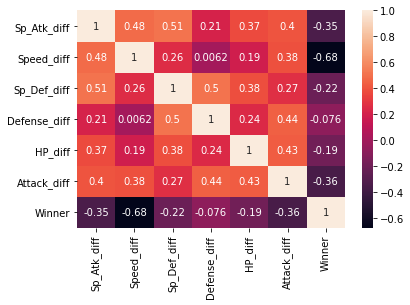

In [41]:
sns.heatmap(fights.corr(), annot=True)

#### Ogni feature presa singolarmente sembra non avere un elevata correlazione, ma tutte insieme invece determinano il vincitore della battablia

## Addestramento del modello

In [42]:
# definisco x/y train e test
X_train = fights.drop(["Winner"], axis=1)
y_train = fights["Winner"]

X_test = fights_test.drop(["Winner"], axis=1)
y_test = fights_test["Winner"]

### Applico un encoder anche alle ultime feature rimaste con type object

In [46]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

### Addestramento e accuracy

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)

print("Accuracy: {:.2f}%".format(dt.score(X_test, y_test)*100))

Accuracy: 93.27%
